<a href="https://colab.research.google.com/github/wereboss/GenAICourse/blob/main/NUS_w1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_file.csv' with actual filename)
df = pd.read_csv('student_data.csv')


In [62]:
df.head()

,student_id,name,age,course,score
0,1001,Alice Smith,22,Python,95.0
1,1002,Bob Johnson,19,Data Science,82.0
2,1003,Charlie Williams,24,Web Development,NaN
3,1004,David Brown,23,Machine Learning,91.0
4,1005,Eva Davis,27,Python,65.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  20 non-null     int64  
 1   name        20 non-null     object 
 2   age         20 non-null     int64  
 3   course      20 non-null     object 
 4   score       18 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 932.0+ bytes


Score showing only 18, so 2 null values
deciding to replace with zero

In [64]:
df = df.fillna(0)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  20 non-null     int64  
 1   name        20 non-null     object 
 2   age         20 non-null     int64  
 3   course      20 non-null     object 
 4   score       20 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 932.0+ bytes


Now dataframe has 20 rows all around

In [66]:
df.describe()

,student_id,age,score
count,20.00000,20.000000,20.000000
mean,1010.50000,22.700000,74.150000
std,5.91608,2.975337,26.976159
min,1001.00000,18.000000,0.000000
25%,1005.75000,20.000000,71.000000
50%,1010.50000,22.500000,82.500000
75%,1015.25000,25.000000,90.250000
max,1020.00000,28.000000,95.000000


In [67]:
df.describe(include='all')

,student_id,name,age,course,score
count,20.00000,20,20.000000,20,20.000000
unique,NaN,20,NaN,4,NaN
top,NaN,Alice Smith,NaN,Python,NaN
freq,NaN,1,NaN,5,NaN
mean,1010.50000,NaN,22.700000,NaN,74.150000
std,5.91608,NaN,2.975337,NaN,26.976159
min,1001.00000,NaN,18.000000,NaN,0.000000
25%,1005.75000,NaN,20.000000,NaN,71.000000
50%,1010.50000,NaN,22.500000,NaN,82.500000
75%,1015.25000,NaN,25.000000,NaN,90.250000


In [68]:
gb_course_score = df.groupby('course')['score']
print(gb_course_score)
gb_course_meanscore = df.groupby('course')['score'].mean()
print(gb_course_meanscore)


course
Data Science        86.0
Machine Learning    67.4
Python              83.2
Web Development     60.0
Name: score, dtype: float64


In [69]:
def get_meanscores(df):
  try:
    tot_course = {}
    cnt_course = {}

    for index, row in df.iterrows():
        course = row['course']
        score = row['score']

        if pd.notnull(score):  # Skip missing scores if any
            if course in tot_course:
                tot_course[course] += score
                cnt_course[course] += 1
            else:
                tot_course[course] = score
                cnt_course[course] = 1

    # Calculate averages
    mean_scores = {}
    for course in tot_course:
        mean_scores[course] = tot_course[course] / cnt_course[course]

  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    mean_scores = {'field':-1}
  finally:
    print("Finished processing average scores.")
    return mean_scores

In [70]:
print(get_meanscores(df))

Finished processing average scores.
{'Python': 83.2, 'Data Science': 86.0, 'Web Development': 60.0, 'Machine Learning': 67.4}


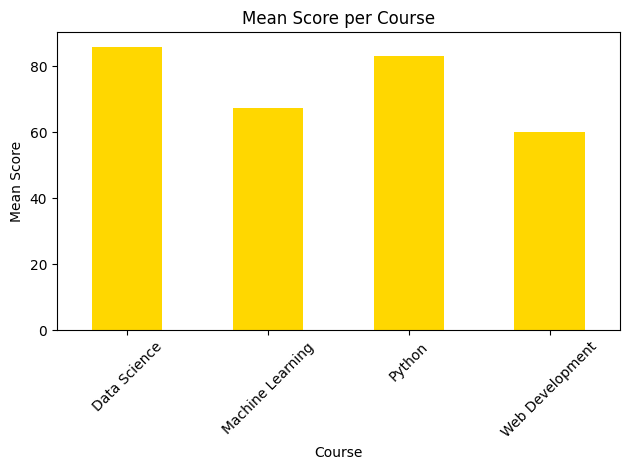

In [71]:
gb_course_meanscore.plot(kind='bar', color='gold')
plt.title('Mean Score per Course')
plt.ylabel('Mean Score')
plt.xlabel('Course')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

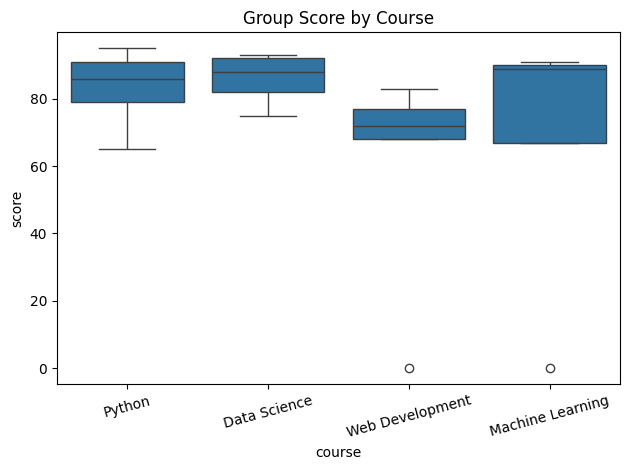

In [72]:
sns.boxplot(x='course', y='score', data=df)
plt.title('Group Score by Course')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


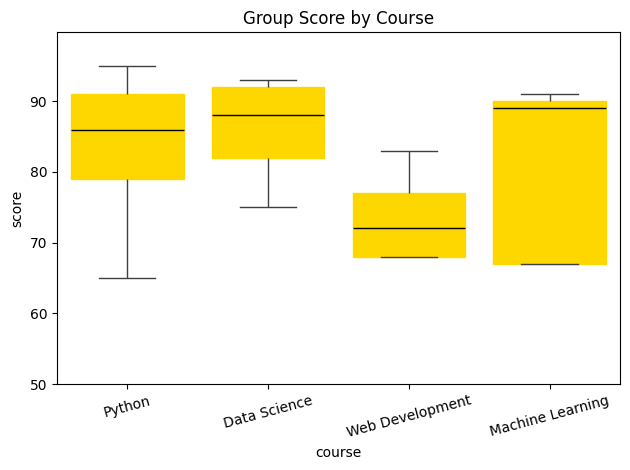

In [73]:
sns.boxplot(x='course', y='score', data=df,boxprops=dict(facecolor='brown', color='gold'),medianprops=dict(color='black'))
plt.title('Group Score by Course')
plt.ylim(bottom=50)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

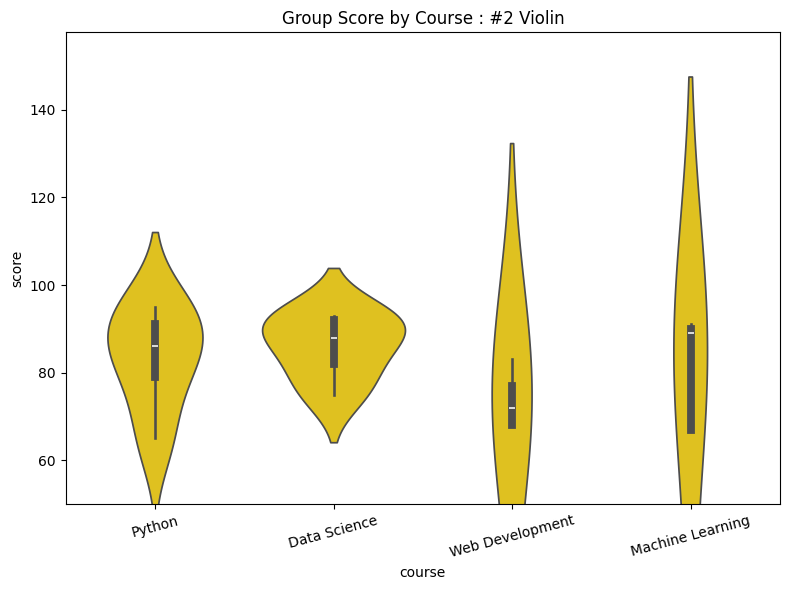

In [74]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='course',
    y='score',
    data=df,
    inner='box',
    color='gold'
)
plt.title('Group Score by Course : #2 Violin')
plt.ylim(bottom=50)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [75]:
df = pd.read_csv('student_data.csv')
df.info()
df['score'] = df['score'].fillna(df['score'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  20 non-null     int64  
 1   name        20 non-null     object 
 2   age         20 non-null     int64  
 3   course      20 non-null     object 
 4   score       18 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 932.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  20 non-null     int64  
 1   name        20 non-null     object 
 2   age         20 non-null     int64  
 3   course      20 non-null     object 
 4   score       20 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 932.0+ bytes


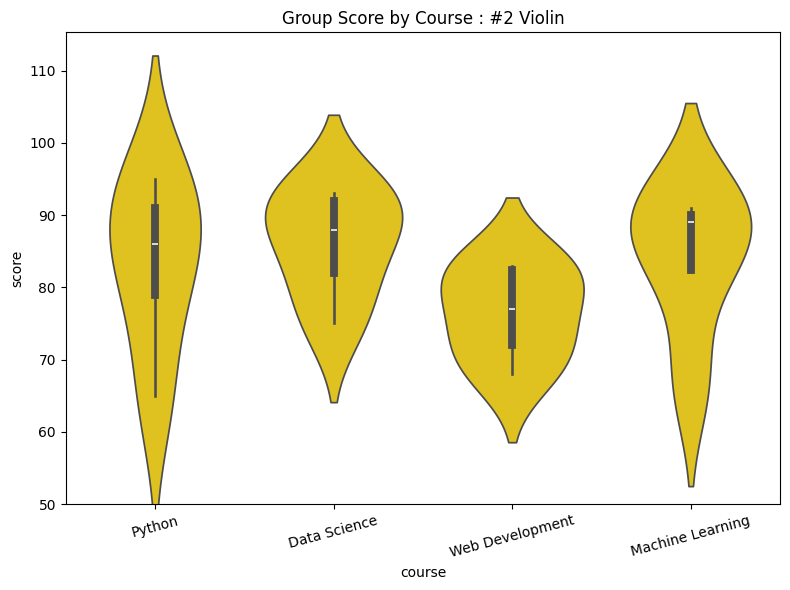

In [76]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='course',
    y='score',
    data=df,
    inner='box',
    color='gold'
)
plt.title('Group Score by Course : #2 Violin')
plt.ylim(bottom=50)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

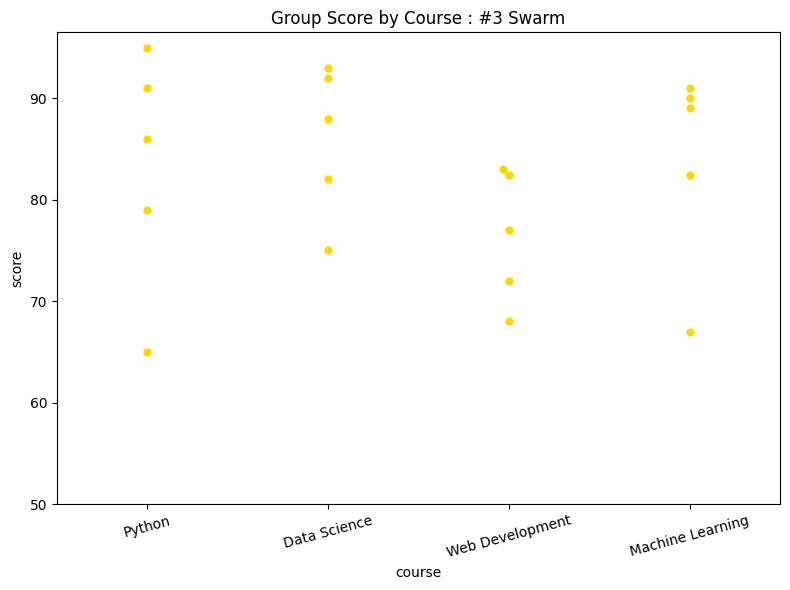

In [77]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='course', y='score', data=df, color='gold', size=6)
plt.title('Group Score by Course : #3 Swarm')
plt.ylim(bottom=50)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

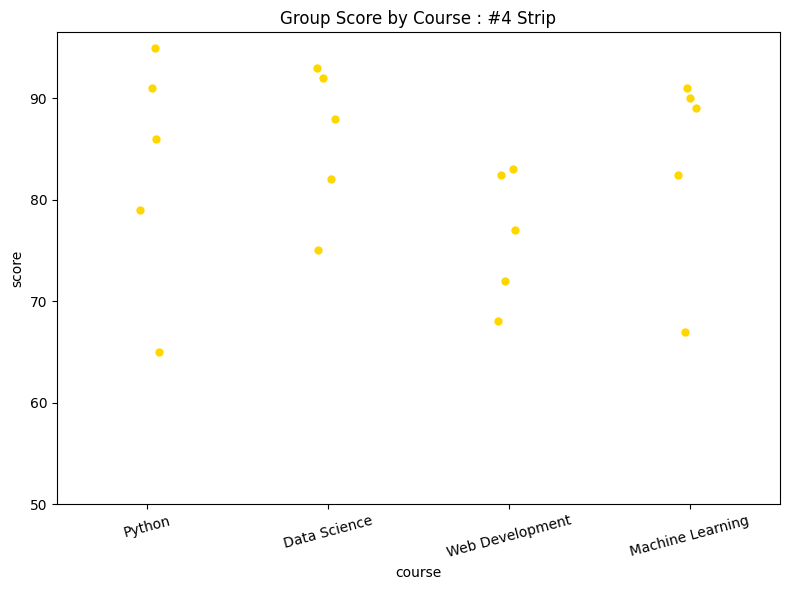

In [78]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='course', y='score', data=df, color='gold', jitter=True, size=6)
plt.title('Group Score by Course : #4 Strip')
plt.ylim(bottom=50)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

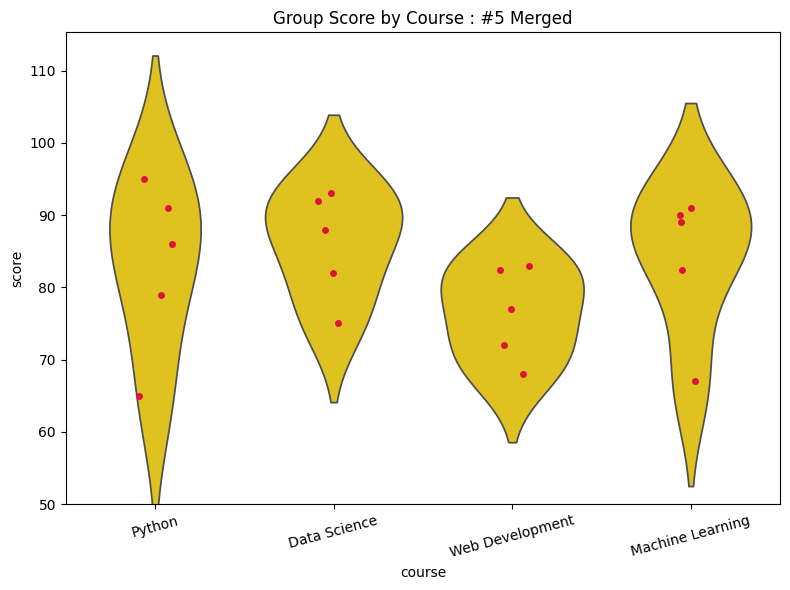

In [79]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='course', y='score', data=df, inner=None, color='gold')
sns.stripplot(x='course', y='score', data=df, color='crimson', jitter=True, size=5)
plt.title('Group Score by Course : #5 Merged')
plt.ylim(bottom=50)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

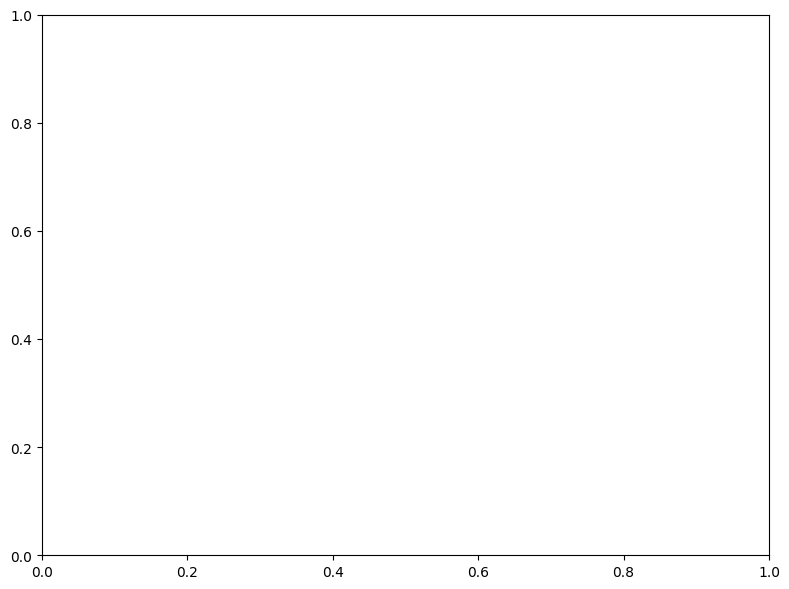

<ipython-input-80-0ef6c9f7703c>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([course], rotation=45)
<ipython-input-80-0ef6c9f7703c>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([course], rotation=45)
<ipython-input-80-0ef6c9f7703c>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([course], rotation=45)
<ipython-input-80-0ef6c9f7703c>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([course], rotation=45)
<ipython-input-80-0ef6c9f7703c>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

In [80]:
from matplotlib.animation import FuncAnimation

courses = df['course'].unique()

fig, ax = plt.subplots(figsize=(8, 6))

def animate(i):
    ax.clear()
    course = courses[i]
    course_data = df[df['course'] == course]
    sns.stripplot(x='course', y='score', data=course_data, color='red', jitter=True, size=6, ax=ax)

    ax.set_ylim(50, 100)
    ax.set_title(f'Score Distribution - {course}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Course')
    ax.set_xticklabels([course], rotation=45)

ani = FuncAnimation(fig, animate, frames=len(courses), interval=1500, repeat=True)
plt.tight_layout()
plt.show()
ani.save('score_animation1.gif', writer='pillow')

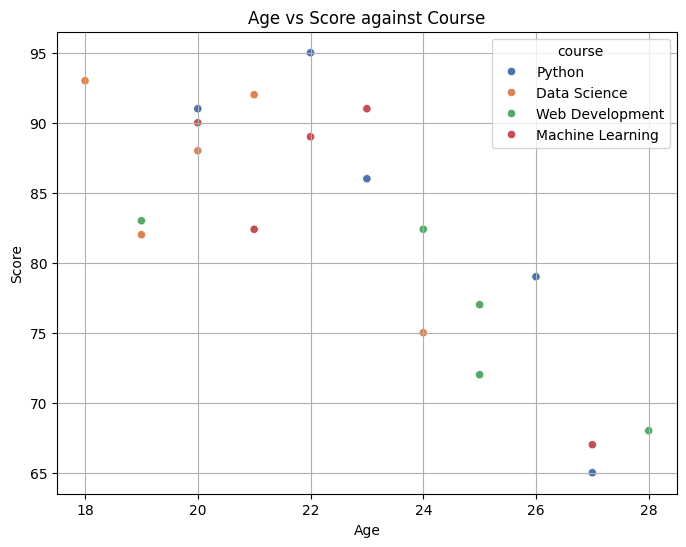

In [81]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='score', data=df, hue='course', palette='deep')
plt.title('Age vs Score against Course')
plt.xlabel('Age')
plt.ylabel('Score')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

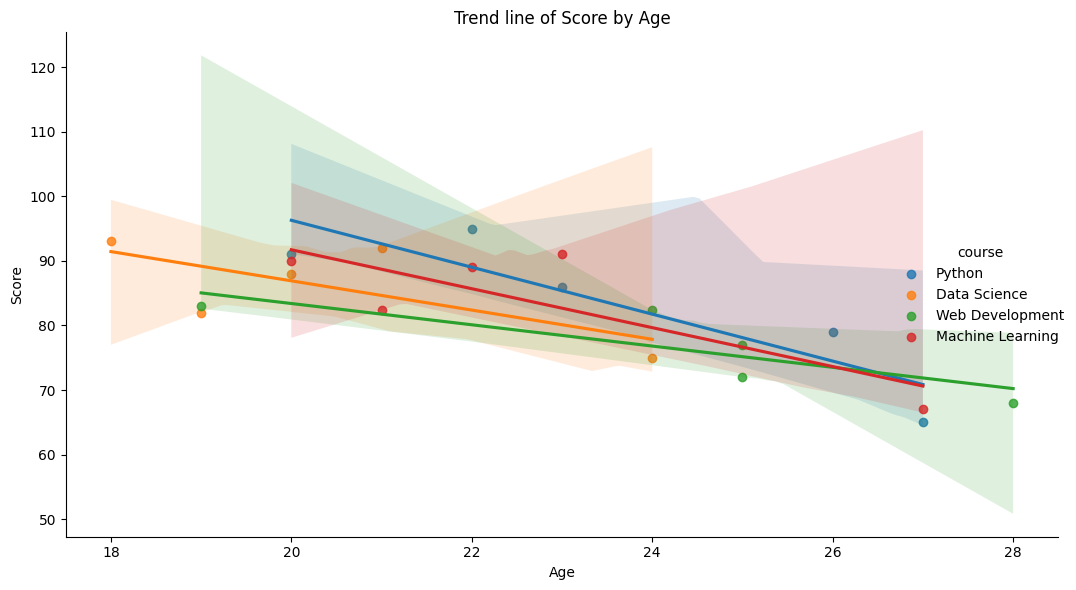

In [82]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='score', data=df, hue='course', aspect=1.5, height=6, markers='o')
plt.title('Trend line of Score by Age')
plt.xlabel('Age')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

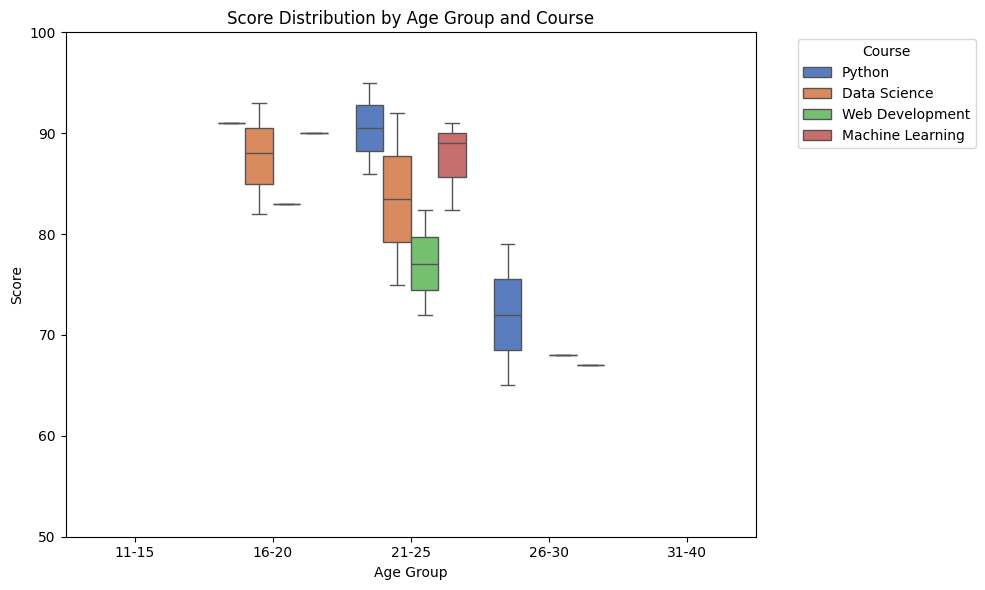

In [83]:

df['age_group'] = pd.cut(df['age'], bins=[10, 15, 20, 25, 30, 40], labels=['11-15', '16-20', '21-25', '26-30', '31-40'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='score', hue='course', data=df, palette='muted')
plt.title('Score Distribution by Age Group and Course')
plt.xlabel('Age Group')
plt.ylabel('Score')
plt.ylim(50, 100)
plt.legend(title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [84]:
summary = df.groupby(['age_group', 'course'])['score'].agg(['mean', 'median', 'std', 'count']).reset_index()
print(summary)

   age_group            course       mean  median        std  count
0      11-15      Data Science        NaN     NaN        NaN      0
1      11-15  Machine Learning        NaN     NaN        NaN      0
2      11-15            Python        NaN     NaN        NaN      0
3      11-15   Web Development        NaN     NaN        NaN      0
4      16-20      Data Science  87.666667    88.0   5.507571      3
5      16-20  Machine Learning  90.000000    90.0        NaN      1
6      16-20            Python  91.000000    91.0        NaN      1
7      16-20   Web Development  83.000000    83.0        NaN      1
8      21-25      Data Science  83.500000    83.5  12.020815      2
9      21-25  Machine Learning  87.462963    89.0   4.506625      3
10     21-25            Python  90.500000    90.5   6.363961      2
11     21-25   Web Development  77.129630    77.0   5.195657      3
12     26-30      Data Science        NaN     NaN        NaN      0
13     26-30  Machine Learning  67.000000    67.

<ipython-input-84-71d6c8b483a2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['age_group', 'course'])['score'].agg(['mean', 'median', 'std', 'count']).reset_index()
